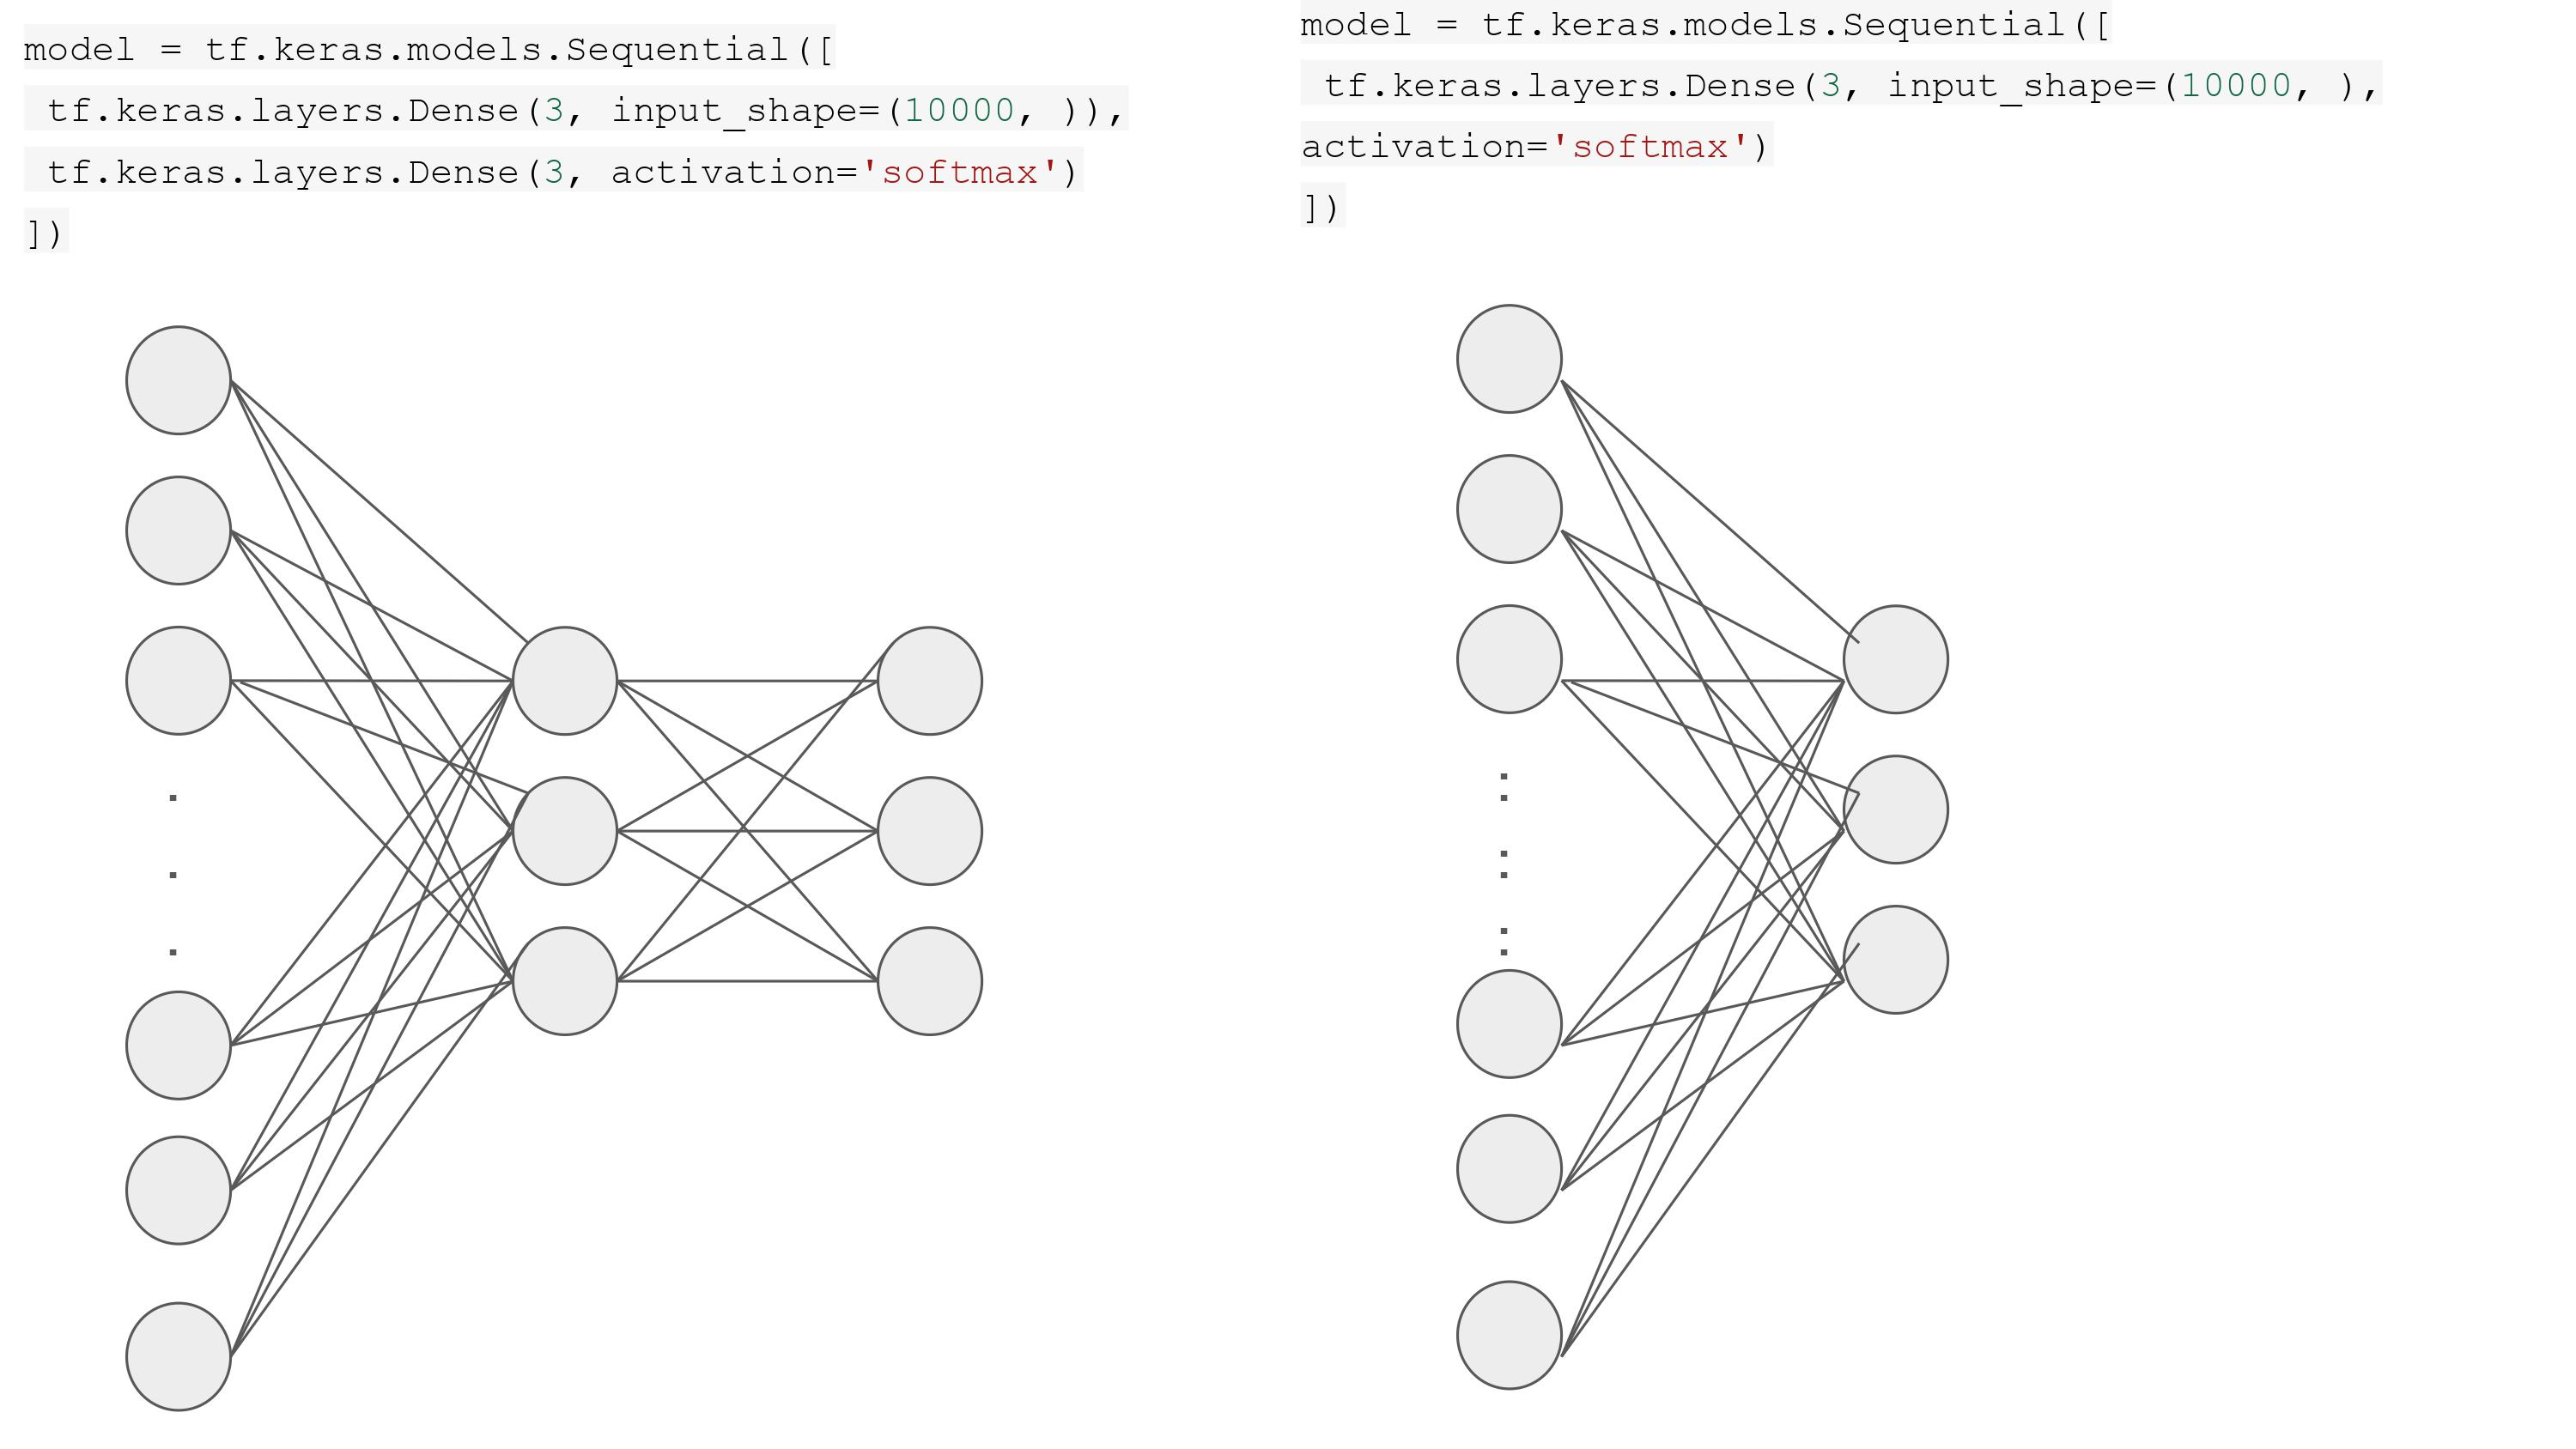

## Preprocessing the dataset for regression
1. Standardization : Change data into the distribution with mean 0 and std1

$$x_{new} = \frac{x-mean(X)}{SD(x)}$$

2. Min-Max normalization : change date with max 1 and min 0

$$x_{new} = \frac{x-min(X)}{max(X)-min(X)}$$


2025.1.15
1. Try with three node

2. Try Eq.(11)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import tensorflow as tf
import os
# import  imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils import to_categorical #For keras > 2.0
# import cv2
import scipy.io
from sklearn.model_selection import train_test_split
from keras import initializers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
# mat = scipy.io.loadmat('EQ13_data.mat')
mat = scipy.io.loadmat('drive/MyDrive/Quantum_reservoir_processing/case1_random_forest.mat')

n1 = mat['n1_selected']
n2 = mat['n2_selected']
n_max = mat['n1_max']
g2 = mat['g2']
phi = mat['phi']
phi = np.reshape(phi,(32,1))
theta = mat['theta']
theta = np.reshape(theta,(32,1))
pop_sou = mat['ns']

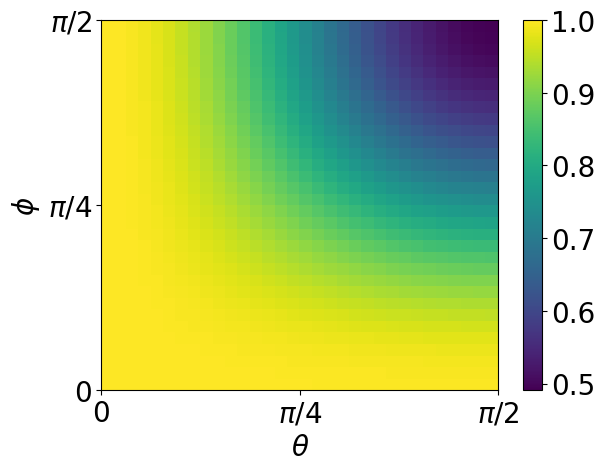

In [5]:
csfont = {'fontname':'Times New Roman'}
plt.pcolor(pop_sou)
plt.xticks([0,16,32],['0','$\pi/4$','$\pi/2$'],fontsize=20)
plt.yticks([0,16,32],['0','$\pi/4$','$\pi/2$'],fontsize=20)
plt.xlabel("$\\theta$",fontsize=20)
plt.ylabel("$\phi$",fontsize=20)
# plt.colorbar(fontsize=20)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)

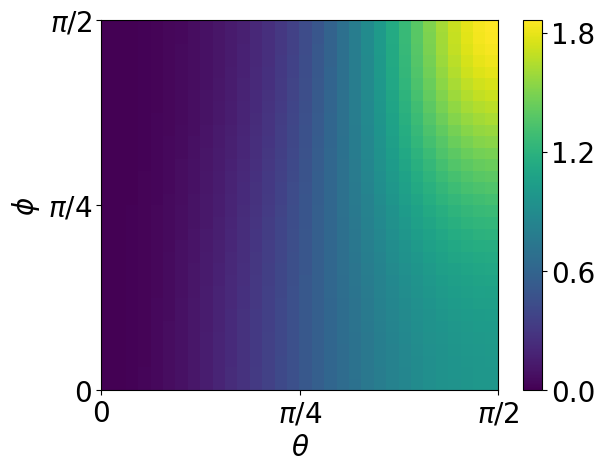

In [6]:
plt.pcolor(g2)
plt.xticks([0,16,32],['0','$\pi/4$','$\pi/2$'],fontsize=20)
plt.yticks([0,16,32],['0','$\pi/4$','$\pi/2$'],fontsize=20)
plt.xlabel("$\\theta$",fontsize=20)
plt.ylabel("$\phi$",fontsize=20)
cbar = plt.colorbar(ticks=[0,0.6,1.2,1.8])
cbar.ax.tick_params(labelsize=20)

In [7]:
g2_re = []
ns = []
for i in range(np.shape(n1)[0]):
  for j in range(np.shape(n1)[0]):
    # input = np.concatenate((np.reshape(n1[i,j],15), np.reshape(n2[i,j],15) ,np.reshape(n1[0,0],15)**2, np.reshape(n1[0,0],15)**2, np.reshape(n1[0,0],15)**3, np.reshape(n1[0,0],15)**3))
    input = np.concatenate((np.reshape(n1[i,j],15), np.reshape(n2[i,j],15)))
    # input = input/sum(input)
    ns.append(input)
    g2_re.append(g2[i,j])

In [ ]:
np.shape(ns)

(1024, 30)

In [8]:
X = np.array(ns)
Y = np.reshape(g2_re,(1024,1))
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
X_c = np.reshape(pop_sou,(1024,1))
Y_c = np.reshape(g2_re,(1024,1))
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_c, Y_c, test_size=0.25)

In [21]:
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)
Y_predict_RFR = regressor.predict(X_test)
MSE_reservoir = mean_squared_error(Y_test, Y_predict_RFR)

regressor_c = RandomForestRegressor()
regressor_c.fit(X_train_c, Y_train_c)
Y_predict_RFR_c = regressor_c.predict(X_test_c)
MSE_c = mean_squared_error(Y_test_c, Y_predict_RFR_c)
# print([MSE_reservoir, MSE_c])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [20]:
#Normalized mean squared error
Nomin = sum(np.square(np.reshape(Y_test,[len(Y_predict_RFR),]) - Y_predict_RFR))
denom = sum(np.square(np.reshape(Y_test,[len(Y_predict_RFR),]) + Y_predict_RFR))

Nomin_c = sum(np.square(np.reshape(Y_test_c,[len(Y_predict_RFR_c),]) - Y_predict_RFR_c))
denom_c = sum(np.square(np.reshape(Y_test_c,[len(Y_predict_RFR_c),]) + Y_predict_RFR_c))

print([Nomin/denom,Nomin_c/denom_c])

[np.float64(0.0014155857635877501), np.float64(0.08119911166473674)]


0.002735481048222337


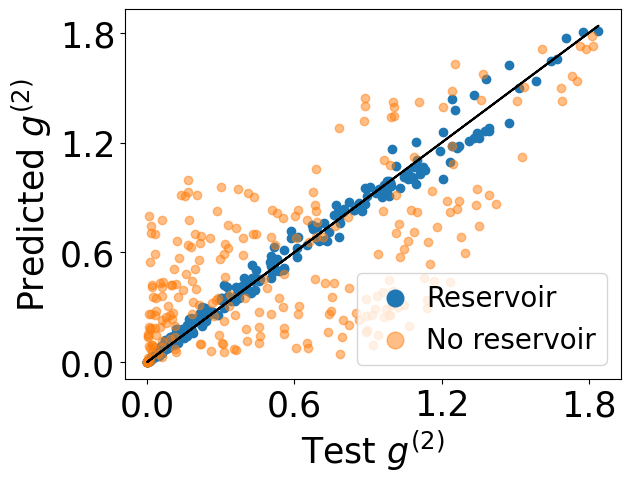

In [10]:
textstr = '\n'.join((
    r'$\mu=%.2f$' ,
    r'$\mathrm{median}=%.2f$' ,
    r'$\sigma=%.2f$'))

# ax.hist(x, 50)
# # these are matplotlib.patch.Patch properties
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# # place a text box in upper left in axes coords
# ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)

error = mean_squared_error(Y_test,Y_predict_RFR)
print(error)
plt.scatter(Y_test, Y_predict_RFR, alpha=1, label="Reservoir")
plt.scatter(Y_test_c, Y_predict_RFR_c, alpha=0.5, label="No reservoir")
plt.plot(Y_test,Y_test,'k')
plt.xticks(ticks=[0,0.6,1.2,1.8],fontsize=25)
plt.yticks(ticks=[0,0.6,1.2,1.8],fontsize=25)
plt.xlabel("Test $g^{(2)}$",fontsize=25)
plt.ylabel("Predicted $g^{(2)}$",fontsize=25)
# plt.text(0.8, 0.5, 'Train score = 0.997',fontsize=20)
# plt.text(0.8, 0.3, 'Test score = 0.989',fontsize=20)
# plt.text(0.8, 0.1, 'MSE = 0.0003',fontsize=25)
# plt.text(0.8, 0.35, 'MSE = 0.1545',fontsize=25)
plt.legend(fontsize=20, handletextpad=0.1,loc=4,markerscale=2)

In [14]:
# plt.subplot(2,2,1)

# plt.subplot(2,2,2)
# plt.scatter(Y_test, Y_predict_RFR, alpha=1, label="Reservoir")
# plt.scatter(Y_test_c, Y_predict_RFR_c, alpha=0.5, label="No reservoir")
# plt.plot(Y_test,Y_test,'k')
# plt.xticks(ticks=[0,0.6,1.2,1.8],fontsize=25)
# plt.yticks(ticks=[0,0.6,1.2,1.8],fontsize=25)
# plt.xlabel("Test $g^{(2)}$",fontsize=25)
# plt.ylabel("Predicted $g^{(2)}$",fontsize=25)
# # plt.text(0.8, 0.5, 'Train score = 0.997',fontsize=20)
# # plt.text(0.8, 0.3, 'Test score = 0.989',fontsize=20)
# # plt.text(0.8, 0.1, 'MSE = 0.0003',fontsize=25)
# # plt.text(0.8, 0.35, 'MSE = 0.1545',fontsize=25)
# plt.legend(fontsize=20, handletextpad=0.1,loc=4,markerscale=2)

# plt.subplot(2,2,3)
# csfont = {'fontname':'Times New Roman'}
# plt.pcolor(pop_sou)
# plt.xticks([0,16,32],['0','$\pi/4$','$\pi/2$'],fontsize=20)
# plt.yticks([0,16,32],['0','$\pi/4$','$\pi/2$'],fontsize=20)
# plt.xlabel("$\\theta$",fontsize=20)
# plt.ylabel("$\phi$",fontsize=20)
# # plt.colorbar(fontsize=20)
# cbar = plt.colorbar()
# cbar.ax.tick_params(labelsize=20)

# plt.subplot(2,2,4)
# plt.pcolor(g2)
# plt.xticks([0,16,32],['0','$\pi/4$','$\pi/2$'],fontsize=20)
# plt.yticks([0,16,32],['0','$\pi/4$','$\pi/2$'],fontsize=20)
# plt.xlabel("$\\theta$",fontsize=20)
# plt.ylabel("$\phi$",fontsize=20)
# cbar = plt.colorbar(ticks=[0,0.6,1.2,1.8])
# cbar.ax.tick_params(labelsize=20)
# # plt.tight_layout()


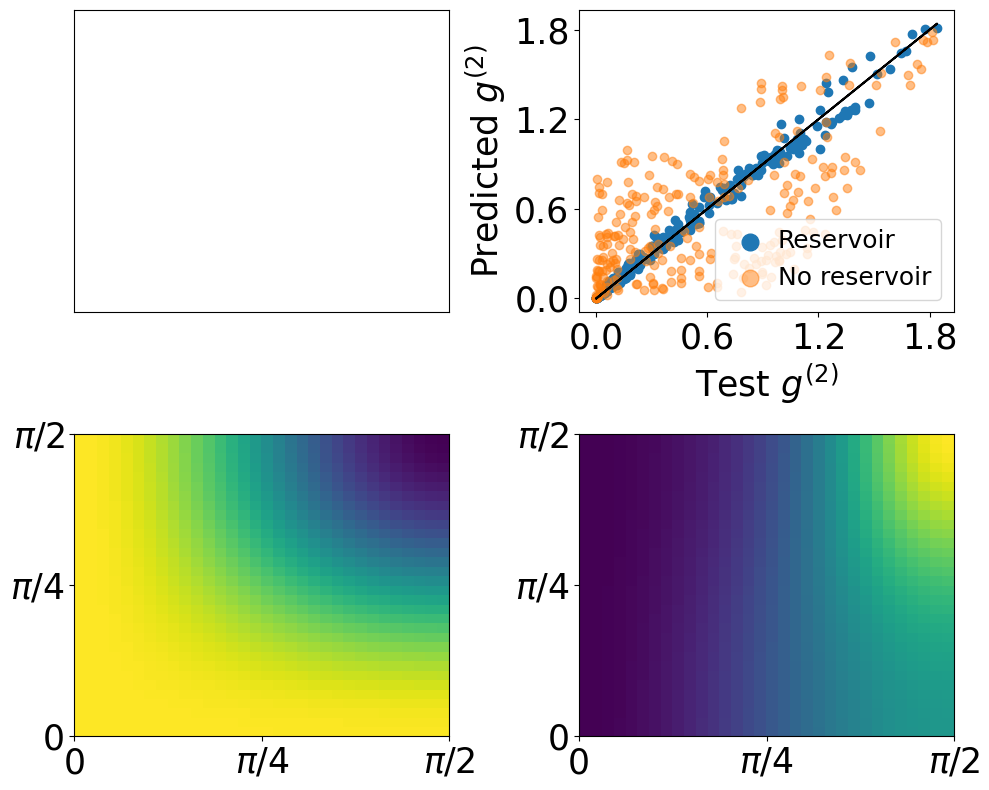

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(10,8))
fig.tight_layout()
font_s = 25

#define data
x = [1, 2, 3]
y = [7, 13, 24]

#create subplots
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])
ax[0, 0].tick_params(width=10,labelsize=font_s)
# ax[0, 1].plot(x, y, color='blue')

ax[0, 1].scatter(Y_test, Y_predict_RFR, alpha=1, label="Reservoir")
ax[0, 1].scatter(Y_test_c, Y_predict_RFR_c, alpha=0.5, label="No reservoir")
ax[0, 1].plot(Y_test,Y_test,'k')
ax[0, 1].tick_params(labelsize=font_s)
ax[0, 1].set_xticks(ticks=[0,0.6,1.2,1.8])
ax[0, 1].set_yticks(ticks=[0,0.6,1.2,1.8])
ax[0, 1].legend(fontsize=18, handletextpad=0.1,loc=4,markerscale=2)
# ax[0, 1].set_xticks(ticks=[0,0.6,1.2,1.8],fontsize=25)
# ax[0, 1].yticks(ticks=[0,0.6,1.2,1.8],fontsize=25)
ax[0, 1].set_xlabel("Test $g^{(2)}$",fontsize=font_s)
ax[0, 1].set_ylabel("Predicted $g^{(2)}$",fontsize=font_s)
# plt.xlabel(fontsize=font_s)


ax[1, 0].pcolor(pop_sou)
ax[1, 0].tick_params(labelsize=font_s)
ax[1, 0].set_xticks([0,16,32],['0','$\pi/4$','$\pi/2$'])
ax[1, 0].set_yticks([0,16,32],['0','$\pi/4$','$\pi/2$'])

ax[1, 1].pcolor(g2)
ax[1, 1].tick_params(labelsize=font_s)
ax[1, 1].set_xticks([0,16,32],['0','$\pi/4$','$\pi/2$'])
ax[1, 1].set_yticks([0,16,32],['0','$\pi/4$','$\pi/2$'])
# fig.colorbar();
plt.tight_layout()

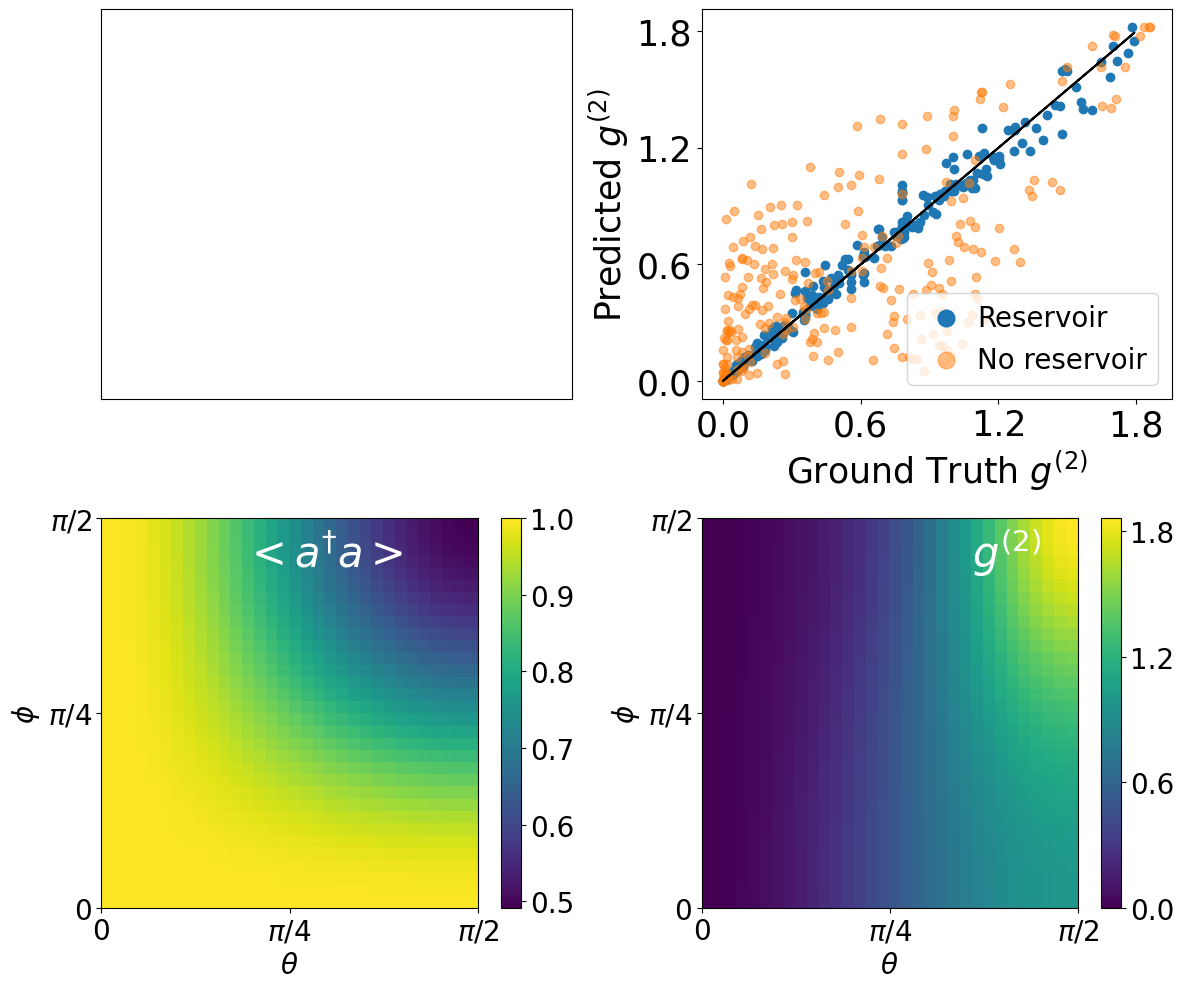

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
plt.xticks(ticks=[],fontsize=25)
plt.yticks(ticks=[],fontsize=25)

plt.subplot(2, 2, 2)
plt.scatter(Y_test, Y_predict_RFR, alpha=1, label="Reservoir")
plt.scatter(Y_test_c, Y_predict_RFR_c, alpha=0.5, label="No reservoir")
plt.plot(Y_test,Y_test,'k')
plt.xticks(ticks=[0,0.6,1.2,1.8],fontsize=25)
plt.yticks(ticks=[0,0.6,1.2,1.8],fontsize=25)
plt.xlabel("Ground Truth $g^{(2)}$",fontsize=25)
plt.ylabel("Predicted $g^{(2)}$",fontsize=25)
# plt.text(0.8, 0.5, 'Train score = 0.997',fontsize=20)
# plt.text(0.8, 0.3, 'Test score = 0.989',fontsize=20)
# plt.text(0.8, 0.1, 'MSE = 0.0003',fontsize=25)
# plt.text(0.8, 0.35, 'MSE = 0.1545',fontsize=25)
plt.legend(fontsize=20, handletextpad=0.1,loc=4,markerscale=2)

plt.subplot(2, 2, 3)
csfont = {'fontname':'Times New Roman'}
plt.pcolor(pop_sou)
plt.xticks([0,16,32],['0','$\pi/4$','$\pi/2$'],fontsize=20)
plt.yticks([0,16,32],['0','$\pi/4$','$\pi/2$'],fontsize=20)
plt.xlabel("$\\theta$",fontsize=20)
plt.ylabel("$\phi$",fontsize=20)
plt.text(12,28,'$<a^{\dagger}a>$',fontsize=30,color='white')
# plt.colorbar(fontsize=20)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)

plt.subplot(2, 2, 4)
plt.pcolor(g2)
plt.xticks([0,16,32],['0','$\pi/4$','$\pi/2$'],fontsize=20)
plt.yticks([0,16,32],['0','$\pi/4$','$\pi/2$'],fontsize=20)
plt.xlabel("$\\theta$",fontsize=20)
plt.ylabel("$\phi$",fontsize=20)
plt.text(23,28,'$g^{(2)}$',fontsize=30,color='white')
cbar = plt.colorbar(ticks=[0,0.6,1.2,1.8])
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()

In [ ]:
print([mean_squared_error(Y_test, Y_predict_RFR),mean_squared_error(Y_test_c, Y_predict_RFR_c)])

[0.003863942178573868, 0.14471944520142746]


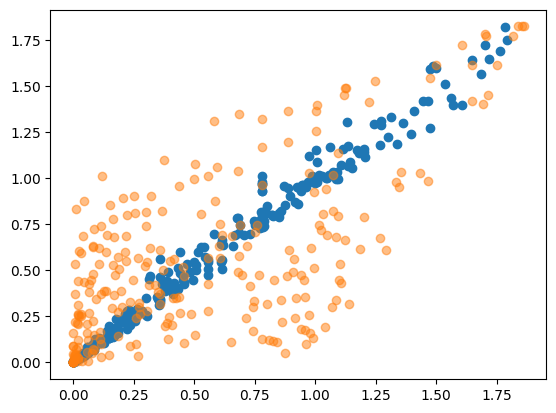

In [ ]:
plt.scatter(Y_test, Y_predict_RFR, alpha=1, label="Reservoir")
plt.scatter(Y_test_c, Y_predict_RFR_c, alpha=0.5, label="No reservoir")